In [6]:
# Standard library
import datetime as dt
# Packages
from matplotlib import pyplot as plt
import numpy as np
# Self-written modules
from data_extraction.tpa_extract import DataExtract
from data_structures.tpa_dataset import TPADataset
from plotting import tpa_hist
%matplotlib inline

In [2]:
variables = ['BxGSE', 'ByGSM', 'vel']
tpa_dir = 'data/'
OMNI_data_dir = 'C:/Users/simon/MATLABProjects/KTH research/Data/OMNI/OMNI_1min_Lv1/'
avgcalctime = 20  # minutes
timeshift = 100  # minutes
datasets = (TPADataset('Kullen et al. (2002)', avgcalctime, timeshift, dt.datetime(1998, 12, 1), dt.datetime(1999, 3, 1)),
            TPADataset('Reidy et al. (2018)', avgcalctime, timeshift, dt.datetime(2015, 12, 1), dt.datetime(2016, 1, 1)))
normalize = True

In [3]:
data_extractor = DataExtract(tpa_dir)

for dataset in datasets:
    # Retrieving data
    dataset.get_dataset_parameters(OMNI_data_dir, variables)
    for TPA in data_extractor.get_tpas(dataset.name):
        TPA.get_parameters(OMNI_data_dir, variables, timeshift=dataset.time_shift,
                           avgcalctime=dataset.average_calctime)
        dataset.append(TPA)

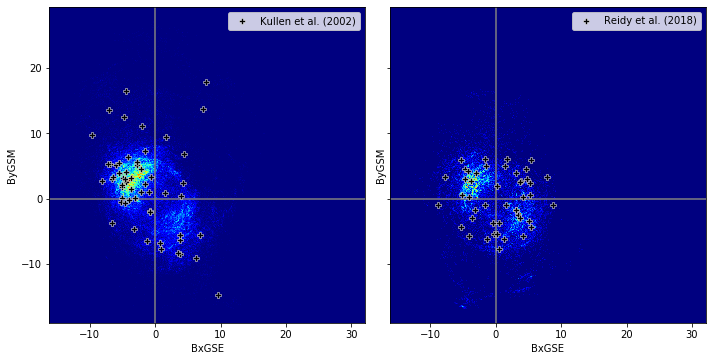

In [4]:
fig, axes = plt.subplots(ncols=len(datasets), figsize=(5 * len(datasets), 5), sharey='all', sharex='all')
axes = np.asarray(axes).flatten()

for dataset, ax in zip(datasets, axes):
    tpa_hist.hist2d_scatter(dataset.tpa_values[variables[0]], dataset.tpa_values[variables[1]],
                   dataset.total[variables[0]], dataset.total[variables[1]], ax, dataset.name, normalize=normalize)
    ax.set_xlabel(variables[0])
    ax.set_ylabel(variables[1])
    ax.axis('square')

fig.tight_layout()

# Plot 1D histogram
This cell shows an example of plotting a 1D histogram using the data in the TPA datasets.

C:\Users\simon\Anaconda3\envs\transpolar-arcs\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\simon\Anaconda3\envs\transpolar-arcs\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


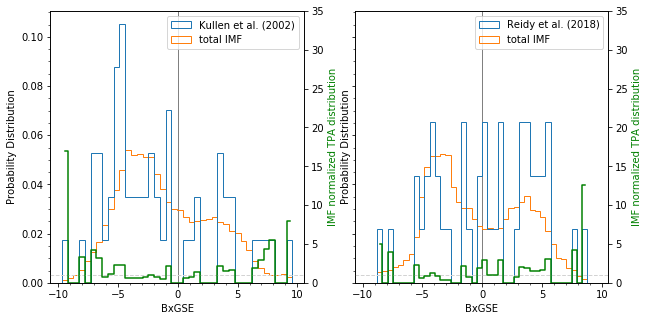

In [7]:
ylim = 35  # Max number of normalized factors that the second axis will show
variable = 'BxGSE'

fig, axes = plt.subplots(ncols=len(datasets), figsize=(5 * len(datasets), 5), sharey='all', sharex='all')
axes = np.asarray(axes).flatten()

for dataset, ax in zip(datasets, axes):
    tpa_hist.hist1d(dataset.tpa_values[variable], dataset.total[variable], ax, dataset.name, normalize=normalize, norm_ymax=ylim, nbins=40)
    ax.set_xlabel(variable)

plt.show()
